# I. Modélisation statistique

In [1]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn

In [2]:
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [46]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

,beneficiaire_trans_eco,moyenne_conso_agri_hab,moyenne_conso_indus_hab,moyenne_conso_tertiaire_hab,moyenne_conso_residentiel_hab,moyenne_conso_totale_hab,emissions_ges,nb_actes_france_renov,friche,ecoquartiers,part_residences_secondaires,beneficiaire_prog,climat,gridens7,superf_choro,departement,gare_tgv,part_trajets_voiture,med_disp,p_pop,CSP_maire,com_variation_encours_dette_ha_pct,part_inactifs,part_actifs,dependance_eco,abstention_municipales,taux_creation_ent,total_entreprises,part_licencies_sportifs,part_jeunes_sans_diplome
code_insee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22001,0,2.994071,0.000503,0.631181,3.688905,7.378017,14871,86,2,0,12.0,0,Autre,7,24.09,22,0,85.7,20300,596,12,18.9,12.751678,47.147651,107,17.4,15.0,20,23.825503,9.1
22002,0,1.283886,0.032120,0.173206,3.248865,4.775226,8621,35,0,0,2.0,0,Autre,5,12.20,22,0,90.2,23570,1148,54,-39.3,11.062718,50.522648,96,53.8,12.1,33,30.836237,4.0
22003,0,0.000000,0.000000,0.524098,2.908468,3.472740,3028,47,0,0,3.4,0,Autre,6,6.38,22,0,91.1,21780,920,56,99.8,14.239130,48.804348,113,53.7,36.7,30,35.760870,0.0
22004,0,0.200325,0.675332,1.267791,3.034877,5.203150,29130,46,6,0,5.5,0,Autre,5,36.41,22,0,88.5,21020,4810,33,-34.1,17.234927,40.540541,126,44.8,12.6,238,24.282744,12.4
22005,0,0.121358,0.082905,1.151104,3.532942,4.926877,4136,10,3,0,16.8,0,Autre,5,14.11,22,0,79.0,18770,1029,77,-14.5,14.188533,42.371234,140,22.9,18.8,64,27.891156,2.6


### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles. 

In [47]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
p_pop                                   int64
CSP_maire                               int64
com_variation_encours_dette_ha_pct

In [48]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat 
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [49]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
p_pop                                    int64
CSP_maire                             category
com_variation_encours_dette_ha_pct     float64
part_inactifs

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [50]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0
abstention_municipales                0


### C) Séparation de la variable à expliquer et des variables explicatives

In [51]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [52]:
import numpy as np

# Convertir les listes en tableaux numpy
X = np.array(X)
y = np.array(y)

In [53]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1189, 31)
Dimensions de y: (1189,)


In [54]:
np.unique(y)

array([0, 1], dtype=int64)

## I.2. Modélisation

### I.2.1. Régression logistique 

#### A) Construction du modèle et prévisions

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # random_state=0 pour avoir le même mélange de données à chaque fois

In [41]:
X_train.shape, y_train.shape

((891, 29), (891,))

In [56]:
X_test.shape, y_test.shape

((298, 31), (298,))

Nous allons maintenant définir notre modèle de régression logistique

In [57]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

etapes = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]
modele_reg_log  = Pipeline(steps=etapes_smote) # Création du pipeline

On entraîne le modèle sur les données

In [58]:
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('reg_log', LogisticRegression())])

On cherche à prédire de nouvelles données grâce aux données test

In [ ]:
y_pred_reg_log = modele_reg_log.predict(X_test)

#### B) Mesure de la performance

Nous allons maintenant évaluer la performance de notre modèle

In [ ]:
score_reg_log = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_reg_log)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Calcul de l'accuracy
from sklearn.metrics import accuracy_score

accuracy_reg_log = accuracy_score(y_test, y_pred_reg_log)
print("L'accuracy est de : ", accuracy_reg_log)

NameError: name 'y_pred_reg_log' is not defined

Nous allons construire la matrice de confusion pour avoir plus de précisions : 

In [ ]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_reg_log = confusion_matrix(y_test, y_pred_reg_log)
print("La matrice de confusion est : \n", mat_conf_reg_log)


NameError: name 'y_pred_reg_log' is not defined

Text(0.5, 427.9555555555555, 'valeur prédite')

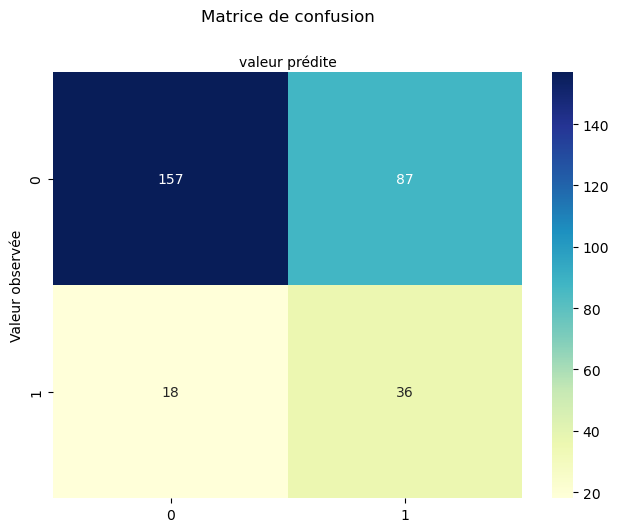

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_reg_log), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

Nous allons maintenant tracer la courbe ROC

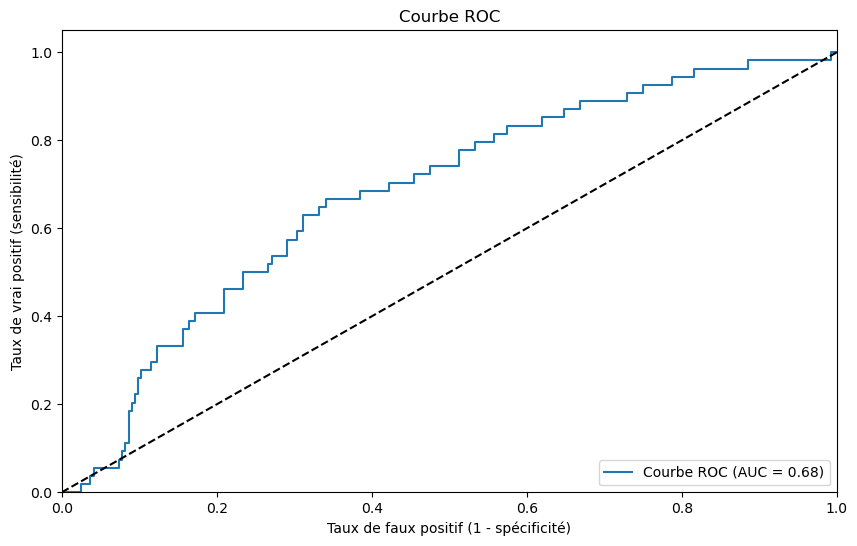

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_reg_log = modele_reg_log.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_reg_log) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

Nous allons maintenant calculer un score

In [ ]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_reg_log = roc_auc_score(y_test, y_pred_prob_reg_log)
score_auc_reg_log

0.6795689131754705

In [ ]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_reg_log = precision_score(y_test, y_pred_reg_log)
print("Precision:", precision_reg_log)

Precision: 0.2926829268292683


In [ ]:
from sklearn.metrics import recall_score

recall_reg_log = recall_score(y_test, y_pred_reg_log)
print("Recall:", recall_reg_log)

Recall: 0.6666666666666666


In [ ]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_reg_log = f1_score(y_test, y_pred_reg_log)
print("F1-Score:", f1_reg_log)

F1-Score: 0.4067796610169492


Nous allons faire un résumé des métriques pour ce modèle : 

In [ ]:
# Résumé du modèle de régression logistique

print("Modèle de régression logistique \n")
#print("L'accuracy est de : ", accuracy_reg_log) # pas utile pour les données déséquilibrées
#print("Score du modèle:", score_reg_log) # pas utile pour les données déséquilibrées
print("Score AUC:", score_auc_reg_log) 
#print("Precision:", precision_reg_log) # on affiche déjà le F1-score
#print("Recall:", recall_reg_log) # on affiche déjà le F1-score
print("F1-Score:", f1_reg_log)

Modèle de régression logistique 

Score AUC: 0.6795689131754705
F1-Score: 0.4067796610169492


### I.2.3. Forêts Aléatoires 

#### A) Construction du modèle

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

etapes = ([
    ("std_scaler", StandardScaler()),
    ("undersampler", RandomOverSampler()),
    ("clf_forets", RandomForestClassifier())
])

etapes_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('clf_forets', RandomForestClassifier()), # Forets alétaoires 
        ]

model_random_forest = Pipeline(steps=etapes_smote)

model_random_forest.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_forets', RandomForestClassifier())])

In [ ]:
y_pred_random_forest = model_random_forest.predict(X_test)

#### B) Mesure de la performance

In [ ]:
score_random_forest = model_random_forest.score(X_test, y_test)
print("Le score du modèle est : ", score_random_forest)

Le score du modèle est :  0.7583892617449665


In [ ]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_random_forest = confusion_matrix(y_test, y_pred_reg_log)
print("La matrice de confusion est : \n", mat_conf_random_forest)

La matrice de confusion est : 
 [[157  87]
 [ 18  36]]


Text(0.5, 427.9555555555555, 'valeur prédite')

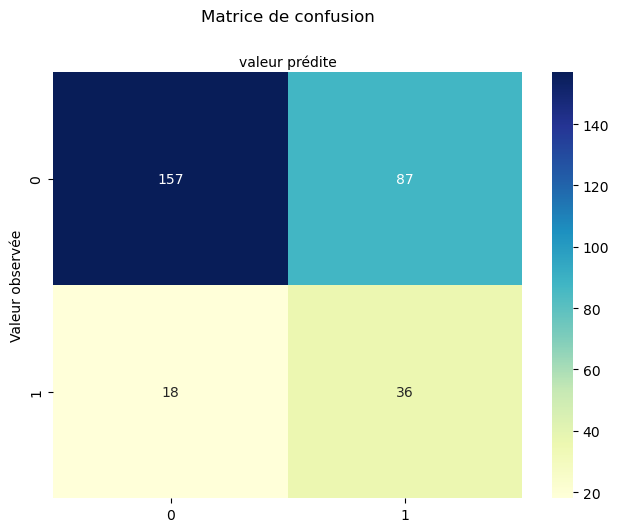

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_random_forest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

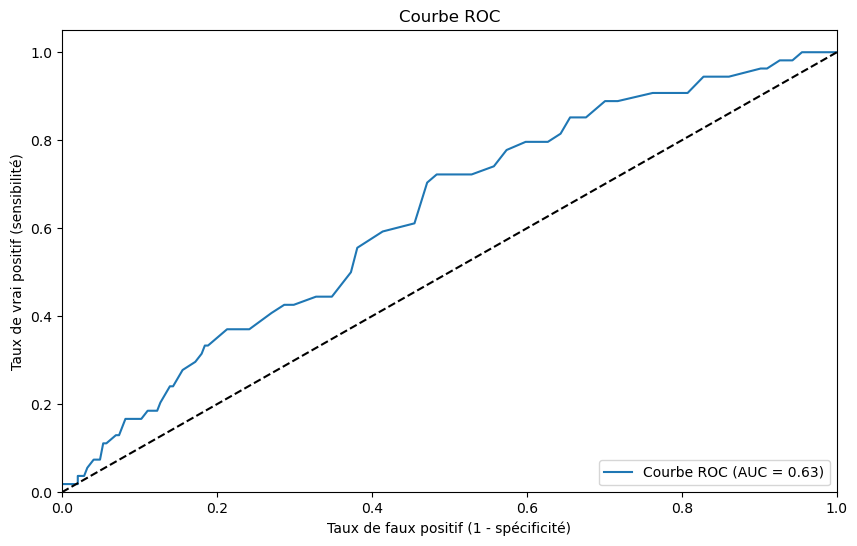

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_random_forest = model_random_forest.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_random_forest) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_random_forest = roc_auc_score(y_test, y_pred_prob_random_forest)
score_auc_random_forest

0.6265558591378263

In [ ]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_random_forest = precision_score(y_test, y_pred_random_forest)
print("Precision:", precision_random_forest)

Precision: 0.2631578947368421


In [ ]:
from sklearn.metrics import recall_score

recall_random_forest = recall_score(y_test, y_pred_random_forest)
print("Recall:", recall_random_forest)

Recall: 0.18518518518518517


In [ ]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_random_forest = f1_score(y_test, y_pred_random_forest)
print("F1-Score:", f1_reg_log)

F1-Score: 0.4067796610169492


In [ ]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_random_forest) 
print("F1-Score:", f1_random_forest)

Modèle de forêts aléatoires 

Score AUC: 0.6265558591378263
F1-Score: 0.21739130434782608


### I.2.4. Gradient Boosting

#### A) Construction du modèle

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Modèle de gradient boosting
etapes = ([("std_scaler", StandardScaler()),
              ("smote", SMOTE()),
              ("clf_boosting", GradientBoostingClassifier())
    ])

model_gradient_boosting = Pipeline(steps=etapes)

In [ ]:
model_gradient_boosting.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_boosting', GradientBoostingClassifier())])

In [ ]:
y_pred_gradient_boosting = model_gradient_boosting.predict(X_test)

#### B) Mesure de la performance

In [ ]:
score_gradient_boosting = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_gradient_boosting)

Le score du modèle est :  0.6476510067114094


In [ ]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
print("La matrice de confusion est : \n", mat_conf_gradient_boosting)

La matrice de confusion est : 
 [[214  30]
 [ 44  10]]


Text(0.5, 427.9555555555555, 'valeur prédite')

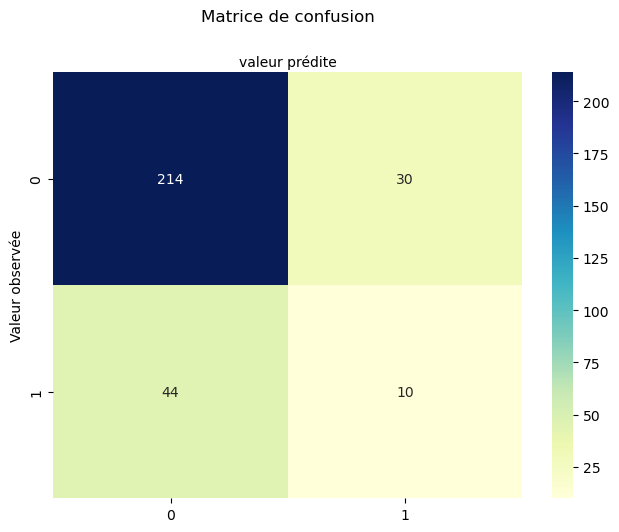

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_gradient_boosting), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

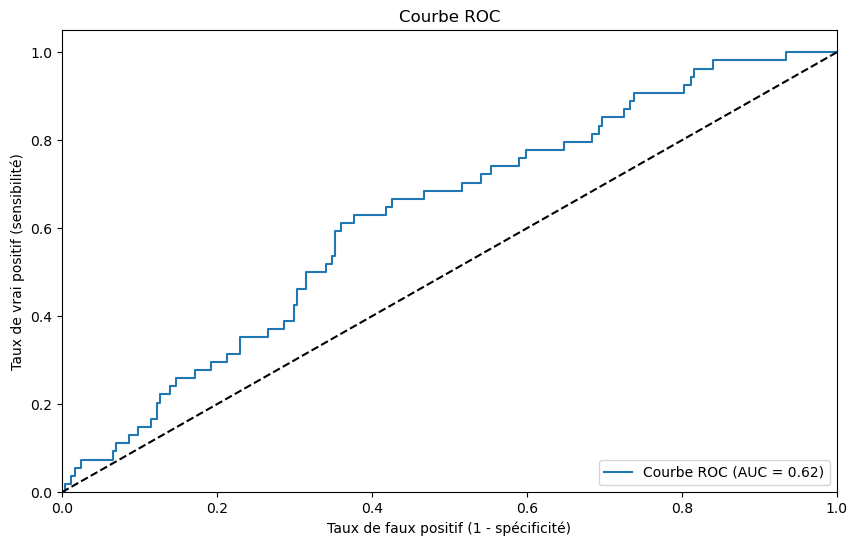

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_gradient_boosting = model_gradient_boosting.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gradient_boosting) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_gradient_boosting = roc_auc_score(y_test, y_pred_prob_gradient_boosting)
score_auc_gradient_boosting

0.6241651487553127

In [ ]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting)
print("Precision:", precision_gradient_boosting)

Precision: 0.25


In [ ]:
from sklearn.metrics import recall_score

recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting)
print("Recall:", recall_gradient_boosting)

Recall: 0.18518518518518517


In [ ]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting)
print("F1-Score:", f1_gradient_boosting)

F1-Score: 0.2127659574468085


In [ ]:
# Résumé du modèle de gradient boosting

print("Modèle de gradient boosting \n")
print("Score AUC:", score_auc_gradient_boosting) 
print("F1-Score:", f1_gradient_boosting)

Modèle de gradient boosting 

Score AUC: 0.6241651487553127
F1-Score: 0.2127659574468085


### I.2.5. Régression ridge

#### A) Construction du modèle

In [ ]:
# Régression ridge

from sklearn.linear_model import RidgeClassifier

etapes = ([
    ("std_scaler", StandardScaler()),
    ("smote", SMOTE()),
    ("clf_ridge", RidgeClassifier())
])

model_reg_ridge = Pipeline(steps=etapes)

In [ ]:
model_reg_ridge.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_ridge', RidgeClassifier())])

In [ ]:
y_pred_reg_ridge = model_reg_ridge.predict(X_test)

#### B) Mesure de la performance

In [ ]:
score_reg_ridge = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_reg_ridge)

Le score du modèle est :  0.6476510067114094


In [ ]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_reg_ridge = confusion_matrix(y_test, y_pred_reg_ridge)
print("La matrice de confusion est : \n", mat_conf_reg_ridge)

La matrice de confusion est : 
 [[159  85]
 [ 20  34]]


Text(0.5, 427.9555555555555, 'valeur prédite')

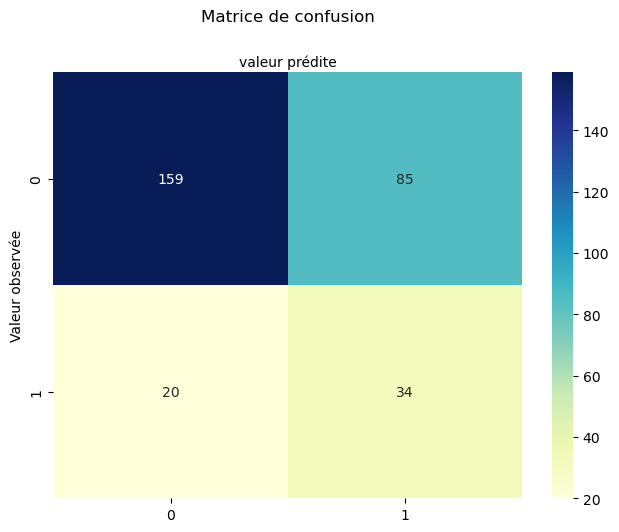

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_reg_ridge), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

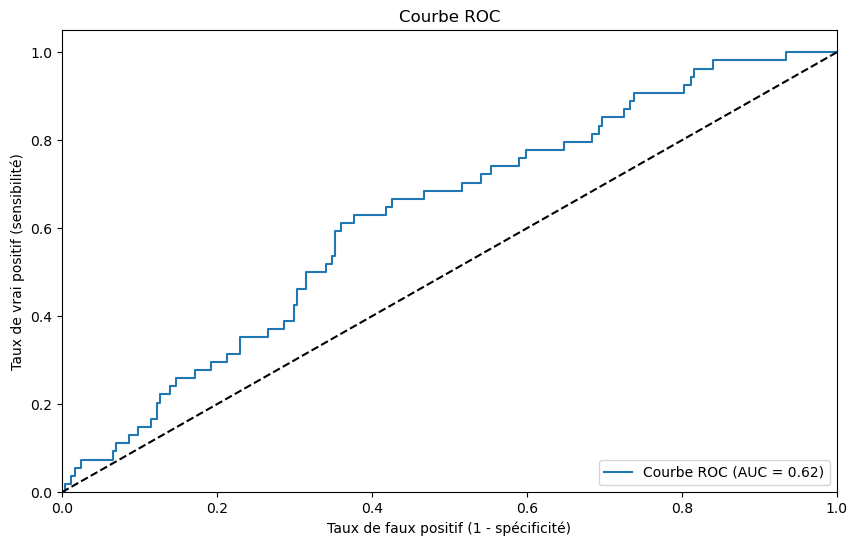

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_reg_ridge = model_gradient_boosting.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_reg_ridge) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_reg_ridge = roc_auc_score(y_test, y_pred_prob_reg_ridge)
score_auc_reg_ridge

0.6241651487553127

In [ ]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_reg_ridge = precision_score(y_test, y_pred_reg_ridge)
print("Precision:", precision_reg_ridge)

Precision: 0.2857142857142857


In [ ]:
from sklearn.metrics import recall_score

recall_reg_ridge = recall_score(y_test, y_pred_reg_ridge)
print("Recall:", recall_reg_ridge)

Recall: 0.6296296296296297


In [ ]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_reg_ridge = f1_score(y_test, y_pred_reg_ridge)
print("F1-Score:", f1_reg_ridge)

F1-Score: 0.39306358381502887


In [ ]:
# Résumé du modèle de gradient boosting

print("Modèle de gradient boosting \n")
print("Score AUC:", score_auc_reg_ridge) 
print("F1-Score:", f1_reg_ridge)

Modèle de gradient boosting 

Score AUC: 0.6241651487553127
F1-Score: 0.39306358381502887


### I.2. ? Utilisation de PyCaret

In [ ]:
!pip install pycaret

In [ ]:
# On place la variable à expliquer en dernier
# Liste des noms de colonnes dans l'ordre souhaité
noms_colonnes = list(donnees.columns)
noms_colonnes.remove("beneficiaire_trans_eco")
noms_colonnes.append("beneficiaire_trans_eco")

# Réindexer le DataFrame avec les nouvelles colonnes
donnees = donnees.reindex(columns=noms_colonnes)
donnees.head()


,moyenne_conso_agri_hab,moyenne_conso_indus_hab,moyenne_conso_tertiaire_hab,moyenne_conso_residentiel_hab,moyenne_conso_totale_hab,emissions_ges,nb_actes_france_renov,friche,ecoquartiers,part_residences_secondaires,...,com_variation_encours_dette_ha_pct,part_inactifs,part_actifs,dependance_eco,abstention_municipales,taux_creation_ent,total_entreprises,part_licencies_sportifs,part_jeunes_sans_diplome,beneficiaire_trans_eco
code_insee,,,,,,,,,,,,,,,,,,,,,
22001,2.994071,0.000503,0.631181,3.688905,7.378017,14871,86,2,0,12.0,...,18.9,12.751678,47.147651,107,17.4,15.0,20,23.825503,9.1,0
22002,1.283886,0.032120,0.173206,3.248865,4.775226,8621,35,0,0,2.0,...,-39.3,11.062718,50.522648,96,53.8,12.1,33,30.836237,4.0,0
22003,0.000000,0.000000,0.524098,2.908468,3.472740,3028,47,0,0,3.4,...,99.8,14.239130,48.804348,113,53.7,36.7,30,35.760870,0.0,0
22004,0.200325,0.675332,1.267791,3.034877,5.203150,29130,46,6,0,5.5,...,-34.1,17.234927,40.540541,126,44.8,12.6,238,24.282744,12.4,0
22005,0.121358,0.082905,1.151104,3.532942,4.926877,4136,10,3,0,16.8,...,-14.5,14.188533,42.371234,140,22.9,18.8,64,27.891156,2.6,0


In [17]:
from pycaret.classification import *
import mlflow

# Initialisation de l'environnement PyCaret
clf = setup(data = donnees, 
            target = "beneficiaire_trans_eco", 
            session_id=123,   
            fix_imbalance=True, 
            fix_imbalance_method='smote') # fix_imbalance_method='smote' pour la sur-échantillonnage des données


ImportError: cannot import name '_Scorer' from 'sklearn.metrics._scorer' (c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py)

In [ ]:
best_model = compare_models()# Comparaison des modèles

## I.3. Sélection du meilleur modèle